# Mission 3

- 아래의 데이터는 회원제로 운영되고 있는 **친환경 식품을 판매하는 소매점**에서 나온 판매 데이터 / 고객 데이터 입니다. 매장에서 제품을 결제하려면 코스트코와 같이, 회원등록을 해야만 결제가 가능합니다. 회원 등록할 때, 회원의 연령, 성별과 같은 기본정보를 수집한 **고객 데이터**가 있습니다. 그리고 각 회원이 매장에서 결제를 진행할 때, 한 제품을 바코드에 찍을 때 마다 발생하는 **결제 데이터**가 존재합니다. 이 두가지 데이터를 이용해서, 아래의 미션을 수행해 봅시다. 

- 먼저 개인 스스로 풀어보고, 풀지 못한 미션은 팀원들과 같이 풀어보세요.
- Chat GPT + 교재 + 팀스터디 모두 활용하여 풀어보시길 바랍니다. 
- 미션 미제출시, 수료증 발급에 제한이 될 수 있습니다. 

- **기한 : 24년 6월 10일 23시 59분까지 / 이후 제출 절대 인정 불가**  
- 제출처: woghkszhf@naver.com  

- 참고 영상 : 
    - 시각화 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGw314hPvsbqV38YY1rqpCkW
    - 데이터 전처리 관련 : https://youtube.com/playlist?list=PLhdHuKlSngGxL_R2g8OYFtsUKs-mMhRBs

1. 1_store_member.csv 데이터를 df_member 변수로, 2_store_product.csv 데이터를 df_product변수로 선언하고, 각각의 데이터의 구조와 타입을 확인하시오  

In [1]:
import pandas as pd

# 1. CSV 파일을 데이터프레임으로 읽기
df_member = pd.read_csv('1_store_member.csv')
df_product = pd.read_csv('2_store_product.csv')

# 2. 데이터의 구조와 타입 확인
# df_member 구조와 타입 확인
print("df_member 데이터 구조:")
print(df_member.info())
print("\ndf_member 데이터 타입:")
print(df_member.dtypes)

print("\n")

# df_product 구조와 타입 확인
print("df_product 데이터 구조:")
print(df_product.info())
print("\ndf_product 데이터 타입:")
print(df_product.dtypes)


df_member 데이터 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회원번호    4396 non-null   int64 
 1   회원상태    4396 non-null   object
 2   성별      4396 non-null   object
 3   결혼유무    3449 non-null   object
 4   주소      4396 non-null   object
 5   생년      4396 non-null   int64 
 6   연령      4396 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 240.5+ KB
None

df_member 데이터 타입:
회원번호     int64
회원상태    object
성별      object
결혼유무    object
주소      object
생년       int64
연령       int64
dtype: object


df_product 데이터 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non

2.  df_product 데이터에서, '회원번호' 별 '구매금액'과 '구매수량'의 합을 계산하고 pandas 라이브러리의 reset_index()함수를 활용해,아래와 같은 테이블로 변환하여, df_product_id 변수로 선언하시오. 

In [20]:
df_grouped = df_product.groupby('회원번호').agg({'구매금액': 'sum', '구매수량': 'sum'}).reset_index()

# 결과를 df_product_id 변수에 저장
df_product_id = df_grouped

df_product_id

,회원번호,구매금액,구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


3. pandas 라이브러리의 rename() 함수를 활용하여, df_product_id 변수의 '구매금액'과 '구매수량'항목 명을, '총구매금액', '총구매수량'으로 변환하시오. 

In [21]:


# 열 이름 변경
df_product_id = df_product_id.rename(columns={'구매금액': '총구매금액', '구매수량': '총구매수량'})

# 결과 출력
df_product_id

,회원번호,총구매금액,총구매수량
0,2101.0,1991230,382.0
1,2102.0,2095860,472.5
2,2103.0,8273550,1675.4
3,2104.0,6289495,1401.8
4,2105.0,3067930,602.0
...,...,...,...
4280,6492.0,51550,10.0
4281,6493.0,22500,3.0
4282,6494.0,18500,3.0
4283,6495.0,5300,1.0


4. df_product 데이터에서, '회원번호' 항목과, '공급일자' 데이터를 활용해, 아래와 같이 각 '회원번호'별 '방문횟수'의 합을 계산하여, df_product_id2 변수로 선언하시오. 

In [28]:
# '방문횟수' 열을 1로 설정
df_product['방문횟수'] = 1
#df_product.head()

# # '회원번호' 별로 '방문횟수'의 합을 계산
df_product_grouped = df_product.groupby('회원번호').agg({'방문횟수': 'sum'}).reset_index()

# 결과를 df_product_id2 변수에 저장
df_product_id2 = df_product_grouped

# 결과 출력
df_product_id2

,회원번호,방문횟수
0,2101.0,342
1,2102.0,409
2,2103.0,1598
3,2104.0,1180
4,2105.0,512
...,...,...
4280,6492.0,9
4281,6493.0,3
4282,6494.0,3
4283,6495.0,1


5. 앞서 생성한 df_product_id 변수와 df_product_id2 변수, df_member 변수를 이용해, '회원번호'를 기준으로 아래와 같이 하나의 데이터로 병합하고, df2 변수로 선언하시오. (pandas merge함수 활용)

In [35]:
# 데이터 병합
df_temp = pd.merge(df_product_id, df_product_id2, on='회원번호')
df2 = pd.merge(df_member, df_temp, on='회원번호')

# 결과 출력
df2

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,방문횟수
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,342
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,409
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,1598
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,6289495,1401.8,1180
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,3067930,602.0,512
...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,51550,10.0,9
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,22500,3.0,3
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,18500,3.0,3
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,5300,1.0,1


6. df2 데이터에서 '총구매금액'과 '총방문횟수'를 나누어, 고객이 한번 방문했을 때, 평균적으로 구매하는 금액 '1회방문구매평균' 항목을 계산하고, 변수로 선언하시오.  

In [36]:

# '1회방문구매평균' 계산
df2['1회방문구매평균'] = df2['총구매금액'] / df2['방문횟수']

# 결과 출력
df2

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,방문횟수,1회방문구매평균
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,342,5822.309942
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,409,5124.352078
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,1598,5177.440551
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,6289495,1401.8,1180,5330.080508
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,3067930,602.0,512,5992.050781
...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,51550,10.0,9,5727.777778
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,22500,3.0,3,7500.000000
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,18500,3.0,3,6166.666667
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,5300,1.0,1,5300.000000


7. df2 데이터에서 고객 '연령'데이터를 이용해, 고객의 '연령대'를 계산하고 파생변수로 선언하시오. 

In [38]:
import numpy as np
# '연령대' 파생변수 계산
def calculate_age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

df2['연령대'] = df2['연령'].apply(calculate_age_group) ##apply 함수로 하는방법 or np.where로 조건문 짜는 방법

# 결과 출력
df2

,회원번호,회원상태,성별,결혼유무,주소,생년,연령,총구매금액,총구매수량,방문횟수,1회방문구매평균,연령대
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,1991230,382.0,342,5822.309942,50대
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,2095860,472.5,409,5124.352078,60대 이상
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,8273550,1675.4,1598,5177.440551,40대
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,6289495,1401.8,1180,5330.080508,40대
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,3067930,602.0,512,5992.050781,60대 이상
...,...,...,...,...,...,...,...,...,...,...,...,...
4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,1963,55,51550,10.0,9,5727.777778,50대
4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,1982,36,22500,3.0,3,7500.000000,30대
4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,1975,43,18500,3.0,3,6166.666667,40대
4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,1961,57,5300,1.0,1,5300.000000,50대


8. df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 확인 하시오. 

In [42]:
# '물품대분류' 별로 '구매수량' 합계 계산
df_grouped = df_product.groupby('물품대분류')['구매수량'].sum()

# '구매수량' 기준으로 내림차순 정렬하여 상위 3개 항목 선택
df_grouped.sort_values(by='구매수량', ascending=False).head(3).reset_index(drop=True)




TypeError: sort_values() got an unexpected keyword argument 'by'

9. 앞서 확인한 3가지 항목을 추출하여, df_product_top이라는 변수로 선언하고, df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산하시오.

In [9]:
# '물품대분류' 별로 '구매수량' 합계 계산
df_grouped = df_product.groupby('물품대분류')['구매수량'].sum().reset_index()

# '구매수량' 기준으로 내림차순 정렬하여 상위 3개 항목 선택
top_3_products = df_grouped.sort_values(by='구매수량', ascending=False).head(3)
top_3_categories = top_3_products['물품대분류'].tolist()

# top_3_categories 항목을 포함하는 데이터 추출
df_product_top = df_product[df_product['물품대분류'].isin(top_3_categories)]

# '구매매장'별 '구매금액'의 합과 평균 계산
df_summary = df_product_top.groupby('구매매장').agg({'구매금액': ['sum', 'mean']}).reset_index()

# 컬럼 이름을 변경
df_summary.columns = ['구매매장', '총구매금액', '평균구매금액']

# 결과 출력
print(df_summary)

  구매매장      총구매금액       평균구매금액
0  매장1  363985400  4770.638426
1  매장2  461745602  4908.271082
2  매장3  916748142  4949.910326
3  매장4  419048570  5019.146844


10. df_product데이터의 '공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성하시오.

In [10]:
# '공급일자'를 날짜 형식으로 변환
df_product['공급일자'] = pd.to_datetime(df_product['공급일자'])

# '연도', '월', '요일' 파생변수 생성
df_product['연도'] = df_product['공급일자'].dt.year
df_product['월'] = df_product['공급일자'].dt.month
df_product['요일'] = df_product['공급일자'].dt.day_name()

# 결과 출력
print(df_product)

                                공급일자       물품코드 물품대분류   물품중분류     물품소분류  \
0      1970-01-01 00:00:00.020170201   50142001    채소  잎/줄기채소       시금치   
1      1970-01-01 00:00:00.020170201   60302012   축산물     육가공  돈가스/분쇄가공   
2      1970-01-01 00:00:00.020170201   80301002    간식     밀가공        라면   
3      1970-01-01 00:00:00.020170201   80301010    간식     밀가공        라면   
4      1970-01-01 00:00:00.020170201   80305003    간식     밀가공        만두   
...                              ...        ...   ...     ...       ...   
735778 1970-01-01 00:00:00.020170630  100201003    반찬   두부/유부        두부   
735779 1970-01-01 00:00:00.020170630  100306006    반찬    즉석조리      간편요리   
735780 1970-01-01 00:00:00.020170630  130214027  생활용품    생활용품    기타생활용품   
735781 1970-01-01 00:00:00.020170630  130501098  생활용품     화장품     기초화장품   
735782 1970-01-01 00:00:00.020170630  110102066    음료      음료        과즙   

                      물품명  구매수량   구매금액 구매매장  반품_원거래일자    회원번호  방문횟수    연도  월  \
0               시금치

11. df_product데이터의 '월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장 하시오. 

In [11]:
# '공급일자'를 날짜 형식으로 변환
df_product['공급일자'] = pd.to_datetime(df_product['공급일자'])

# '월' 파생변수 생성
df_product['월'] = df_product['공급일자'].dt.month

# '월'에 따른 '물품대분류'별 '구매금액'의 합 계산
df_pivot = df_product.pivot_table(values='구매금액', index='월', columns='물품대분류', aggfunc='sum', fill_value=0)

# 결과를 엑셀 파일로 저장
df_pivot.to_excel('result8.xlsx')

# 결과 출력 (엑셀 파일로 저장된 내용 확인)
print(df_pivot)

물품대분류         간식         건강         과실  급식용  기타         반찬  베이커리       생활용품  \
월                                                                             
1      447968491  171752574  233851625    0   0  273803360  4800  249400545   

물품대분류        서류         수산      양념/가루         음료        잡곡         주곡  \
월                                                                       
1      52969380  361432125  280054978  178063787  64252620  143048950   

물품대분류       주류         채소         축산물  
월                                      
1      6885330  598253978  1115305245  


12. df2 데이터를 이용해, '성별'에 따른 '총구매금액'의 평균을 시각화 하시오. 

c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\home\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\home\anaconda3\lib

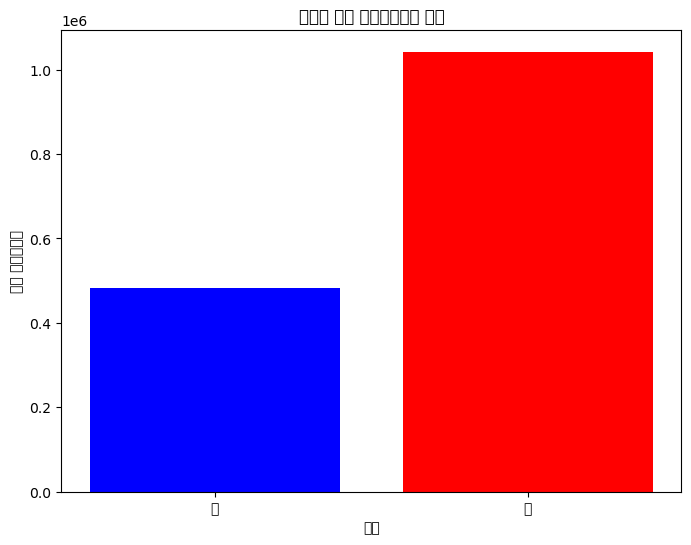

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 데이터프레임으로 읽기
# df2 데이터프레임이 이미 생성된 상태로 가정
# df2 = pd.read_csv('path_to_df2.csv')

# '성별'에 따른 '총구매금액'의 평균 계산
gender_avg_purchase = df2.groupby('성별')['총구매금액'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
plt.bar(gender_avg_purchase['성별'], gender_avg_purchase['총구매금액'], color=['blue', 'red'])
plt.xlabel('성별')
plt.ylabel('평균 총구매금액')
plt.title('성별에 따른 총구매금액의 평균')
plt.show()

13. df2 데이터를 이용해, '1회방문구매평균'을 바탕으로 고객등급을 분류하고자 한다. 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류하여, '고객등급'이라는 새로운 항목을 생성하시오.  

In [15]:
df2['1회방문구매평균'] = df2['구매금액'] / df2.shape[0]

# '고객등급' 분류 기준 설정
conditions = [
    (df2['1회방문구매평균'] >= 100000),
    (df2['1회방문구매평균'] >= 50000),
    (df2['1회방문구매평균'] >= 20000),
    (df2['1회방문구매평균'] < 20000)
]

choices = ['A', 'B', 'C', 'D']

# '고객등급' 컬럼 생성
df2['고객등급'] = pd.cut(df2['1회방문구매평균'], bins=[0, 20000, 50000, 100000, float('inf')], labels=['D', 'C', 'B', 'A'], right=False)

# 결과 출력
print(df2)

KeyError: '구매금액'

14. df2에서 '고객등급'을 input 함수를 이용해 특정 값을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량(describe 함수 활용)을 계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성하시오. 

In [14]:
import pandas as pd

# CSV 파일을 데이터프레임으로 읽기 (예제에서는 이미 df2가 있다고 가정)
# df2 = pd.read_csv('path_to_df2.csv')

# '1회방문구매평균' 계산
df2['1회방문구매평균'] = df2['총구매금액'] / df2['총방문횟수']

# 고객등급 입력 받기
input_grade = input("고객등급을 입력하세요 (A, B, C, D): ").strip()

# 입력된 고객등급에 해당하는 데이터 필터링
filtered_df = df2[df2['고객등급'] == input_grade]

# '성별'에 따른 '총구매금액' 기술통계량 계산
grouped_stats = filtered_df.groupby('성별')['총구매금액'].describe()

# 엑셀 파일로 저장
output_filename = f"result9_{input_grade}.xlsx"
grouped_stats.to_excel(output_filename)

print(f"파일이 {output_filename}에 저장되었습니다.")


KeyError: '총방문횟수'